In [1]:
import numpy as np
import pandas as pd
import math
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [854]:
data = pd.read_csv('group04.txt')
data

,x,y
0,-4.98,896260.03
1,-4.94,836639.80
2,-4.89,767007.86
3,-4.88,753705.40
4,-4.78,631368.25
...,...,...
95,4.53,1030635.93
96,4.56,1083709.22
97,4.64,1237097.49
98,4.70,1364282.15


In [855]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
print(len(X), y.shape)

100 (100,)


In [856]:
X = X/5
X

array([-0.996, -0.988, -0.978, -0.976, -0.956, -0.952, -0.942, -0.924,
       -0.904, -0.878, -0.876, -0.874, -0.862, -0.768, -0.75 , -0.744,
       -0.716, -0.71 , -0.68 , -0.672, -0.664, -0.662, -0.644, -0.598,
       -0.568, -0.558, -0.522, -0.494, -0.464, -0.462, -0.442, -0.44 ,
       -0.422, -0.418, -0.392, -0.382, -0.37 , -0.364, -0.344, -0.336,
       -0.32 , -0.314, -0.308, -0.282, -0.278, -0.266, -0.256, -0.218,
       -0.18 , -0.164, -0.122, -0.058, -0.038, -0.01 , -0.   ,  0.048,
        0.054,  0.07 ,  0.108,  0.11 ,  0.126,  0.146,  0.15 ,  0.206,
        0.21 ,  0.228,  0.242,  0.252,  0.27 ,  0.31 ,  0.364,  0.408,
        0.42 ,  0.458,  0.476,  0.498,  0.51 ,  0.586,  0.588,  0.63 ,
        0.652,  0.654,  0.66 ,  0.668,  0.694,  0.698,  0.718,  0.746,
        0.762,  0.77 ,  0.776,  0.78 ,  0.802,  0.83 ,  0.876,  0.906,
        0.912,  0.928,  0.94 ,  0.972])

In [857]:
y

array([8.96260030e+05, 8.36639800e+05, 7.67007860e+05, 7.53705400e+05,
       6.31368250e+05, 6.09101210e+05, 5.56409190e+05, 4.71524510e+05,
       3.90676640e+05, 3.03824770e+05, 2.97903610e+05, 2.92084150e+05,
       2.59208910e+05, 9.49696300e+04, 7.71442500e+04, 7.18906000e+04,
       5.12770200e+04, 4.76034600e+04, 3.24646600e+04, 2.92174500e+04,
       2.62586800e+04, 2.55616400e+04, 1.99733600e+04, 1.02331200e+04,
       6.39803000e+03, 5.43467000e+03, 2.92922000e+03, 1.74532000e+03,
       9.60020000e+02, 9.20220000e+02, 5.99330000e+02, 5.73410000e+02,
       3.80850000e+02, 3.46160000e+02, 1.81600000e+02, 1.41150000e+02,
       1.00870000e+02, 8.55000000e+01, 4.72400000e+01, 3.75300000e+01,
       2.21300000e+01, 1.85800000e+01, 1.48400000e+01, 6.88000000e+00,
       5.84000000e+00, 3.51000000e+00, 3.03000000e+00, 2.44000000e+00,
       8.00000000e-01, 4.00000000e-02, 2.70000000e-01, 2.70000000e-01,
       1.50000000e-01, 1.10000000e+00, 1.86000000e+00, 3.66000000e+00,
      

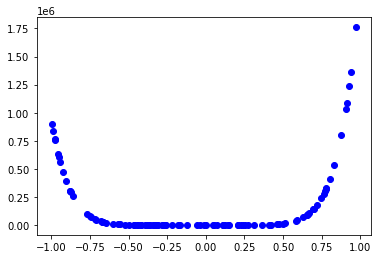

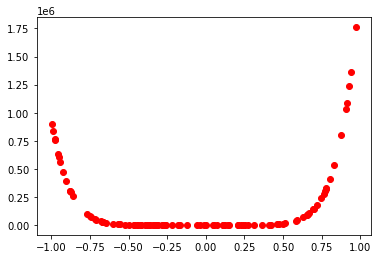

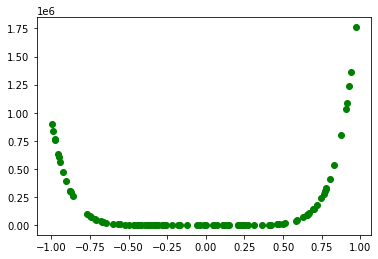

In [858]:
plt.scatter(X, y, color = 'blue')
plt.show()


In [859]:
def L(n,x):
    if n==0:
        return 1
    elif n==1:
        return x
    else:
        return ((2*n-1)*x*L(n-1,x) - (n-1)*L(n-2,x))/n

In [860]:
def Leg_power(X,n):
    r= len(X)
    A=np.ones(r)
    for i in range(r):
        A[i]=L(n,X[i])
    return A

In [861]:
def normalize(value):
    return (value - np.mean(value))/(np.max(value) - np.min(value))

In [862]:
def transform(x, degree):
    m = len(x)
    X_trans = np.ones((m,1))
    j = 0
    for j in range(degree + 1):
        if j != 0:
            x_pow = Leg_power(x,j)
            X_trans = np.append(X_trans, x_pow.reshape( -1, 1 ), axis = 1)
    return X_trans

In [863]:
X_trans = transform(X, 6)
X_trans

array([[ 1.        , -0.996     ,  0.988024  , -0.97611984,  0.96035888,
        -0.94083553,  0.91766661],
       [ 1.        , -0.988     ,  0.964216  , -0.92907568,  0.88320985,
        -0.82743985,  0.76276118],
       [ 1.        , -0.978     ,  0.934726  , -0.87160338,  0.79070468,
        -0.69467382,  0.58662959],
       [ 1.        , -0.976     ,  0.928864  , -0.86028544,  0.77271953,
        -0.66928532,  0.55364159],
       [ 1.        , -0.956     ,  0.870904  , -0.75030704,  0.60208568,
        -0.4358234 ,  0.26211509],
       [ 1.        , -0.952     ,  0.859456  , -0.72900352,  0.56992786,
        -0.39342557,  0.21171888],
       [ 1.        , -0.942     ,  0.831046  , -0.67674222,  0.49232505,
        -0.29339258,  0.09641811],
       [ 1.        , -0.924     ,  0.780664  , -0.58622256,  0.36242388,
        -0.13380535, -0.07535364],
       [ 1.        , -0.904     ,  0.725824  , -0.49090816,  0.23224871,
         0.01481143, -0.21808807],
       [ 1.        , -0.878 

In [864]:
def hypothesis(x, w):
    h = w[0]
    for i in np.arange(1, len(w)):
        h += w[i]*(L(i,x))
    return h

In [865]:
def Error(x, y, w):
    m = len(y)
    h = hypothesis(x,w)
    error = h-y
    error2=np.absolute(error)
    return (1/(2*m))*np.sum(error2)

In [866]:
def ErrorRMS(x, y, w):
    m = len(y)
    h = hypothesis(x,w)
    error = h-y
    error2=error**2
    return ((1/m)*np.sum(error2))**0.5

In [867]:
def gradDescentRMS(x,y,degree,learningRate,tol,iterations):
    X_trans = transform(x,degree)
    m = len(x)
    w = np.random.rand(degree+1)-np.random.rand(degree+1)
    ein=ErrorRMS(x,y,w)
    errors = []
    for i in range(iterations):
        errors.append(ein)
        count=1
        h = hypothesis(x,w)
        e = (h-y)/ErrorRMS(x,y,w)
        e1= np.sign(e)
        w_temp = w -learningRate * (1/m)*np.dot(e,X_trans)
        e_temp=ErrorRMS(x,y,w_temp)
        temp_learn = learningRate
        while count < 100 and e_temp >= ein:
            temp_learn = temp_learn/2
            w_temp = w-temp_learn * (1/m)*np.dot(e1,X_trans)
            e_temp=ErrorRMS(x,y,w_temp)
            count+=1
        
        if ein < tol or ein <= e_temp :
            break
        ein = e_temp
        w=w_temp
    print("for "+str(degree)+" iterations = "+str(i))
    return w,errors,np.var(e,ddof=1)

In [868]:
def gradDescent(x,y,degree,learningRate,tol,iterations):
    X_trans = transform(x,degree)
    m = len(x)
    w = 10**5*(np.random.rand(degree+1)-np.random.rand(degree+1))
    ein=Error(x,y,w)
    errors = []
    for i in range(iterations):
        n1=np.random.randint(len(x))
        errors.append(ein)
        count=1
        h = hypothesis(x[n1],w)
        e = h-y[n1]
        e1= np.sign(e)
        w_temp = w -learningRate * (1/m)*e1*X_trans[n1]
        e_temp=Error(x,y,w_temp)
        temp_learn = learningRate
        while count < 30 and e_temp >= ein:
            temp_learn = temp_learn/2
            w_temp = w-temp_learn * (1/m)*e1*X_trans[n1]
            e_temp=Error(x,y,w_temp)
            count+=1
        
        if ein < tol:
            break
        if ein <= e_temp:
            continue
        ein = e_temp
        w=w_temp
    print("for "+str(degree)+" iterations = "+str(i))
    return w,errors,np.var(e)

In [869]:
def RegGradDescent(x,y,degree,learningRate,tol,iterations,reg_const):
    X_trans = transform(x,degree)
    m = len(x)
    w = 10**5+0*(np.random.rand(degree+1)-np.random.rand(degree+1))
    ein=Error(x,y,w)
    errors = []
    for i in range(iterations):
        count=1
        errors.append(ein)
        h = hypothesis(x,w)
        w1 =reg_const * (np.sign(w[1:]))
        w1=np.append([0],w1)
        e = h-y
        e1= np.sign(e)
        w_temp = w -learningRate *  (1/m*(np.dot(e1,X_trans) + w1)) 
        e_temp=Error(x,y,w_temp)
        temp_learn = learningRate
        while count < 20 and e_temp >= ein:
            temp_learn = temp_learn/2
            w_temp = w-temp_learn * (1/m)*np.dot(e1,X_trans)
            e_temp=Error(x,y,w_temp)
            count+=1
        
        if ein < tol or ein <= e_temp :
            break
        ein = e_temp
        w=w_temp
    print("for "+str(degree)+" iterations = "+str(i))
    return w,errors,np.var(e)

In [870]:
def NoiseVar(x,y,w):
    h = hypothesis(x,w)
    e = h-y
    print("expected noise variance =" +str(np.var(e,ddof=1)))

In [871]:
def FindMinIndex(b):
    index=0;
    for i in range(len(b)):
        if abs(b[i])<abs(b[index]):
            index=i
    return index

In [872]:
def MatrixMethod(X,y,degree,reg_constant):
    X1 = np.array(transform(X,degree))
    b = np.identity(degree+1, dtype = float)
    b[0][0]=0
    return (np.linalg.inv( X1.transpose() @ X1 +reg_constant*b)) @ (X1.transpose() @ y)

for 0 iterations = 100
for 0 iterations = 100
for 0 iterations = 100
for 0 iterations = 100
for 0 iterations = 100
for 1 iterations = 266
for 1 iterations = 265
for 1 iterations = 264
for 1 iterations = 262
for 1 iterations = 259
for 2 iterations = 463
for 2 iterations = 461
for 2 iterations = 456
for 2 iterations = 448
for 2 iterations = 445
for 3 iterations = 744
for 3 iterations = 734
for 3 iterations = 726
for 3 iterations = 732
for 3 iterations = 735
for 4 iterations = 1186
for 4 iterations = 1159
for 4 iterations = 1155
for 4 iterations = 1163
for 4 iterations = 1165
for 5 iterations = 1777
for 5 iterations = 1761
for 5 iterations = 1766
for 5 iterations = 1780
for 5 iterations = 1747
for 6 iterations = 1999
for 6 iterations = 1999
for 6 iterations = 1999
for 6 iterations = 1999
for 6 iterations = 1999
for 7 iterations = 1999
for 7 iterations = 1999
for 7 iterations = 1999
for 7 iterations = 1999
for 7 iterations = 1999
for 8 iterations = 1999
for 8 iterations = 1999
for 8 iterat

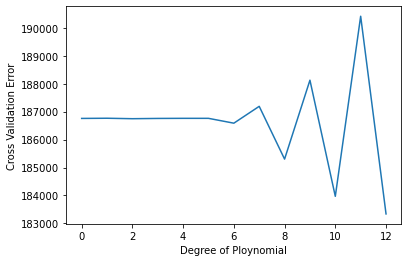

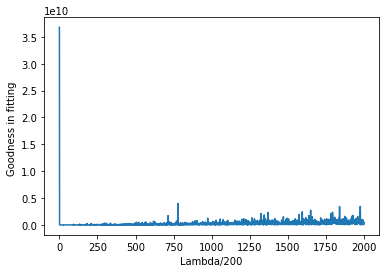

the variance in noise is : 85280368081.3819


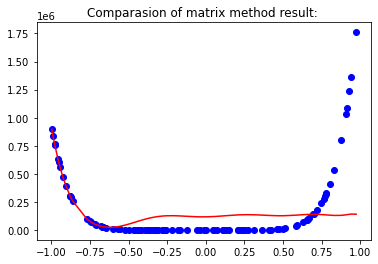

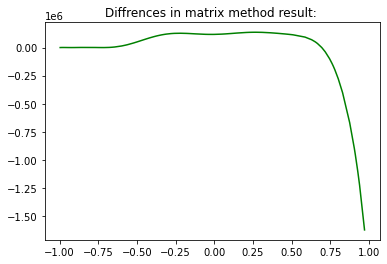

so our ploynomial is 142825.77761399746 +-53013.1469745636x^1 +128315.95536231995x^2 +-182891.24296814203x^3 +186816.8933161497x^4 +-139936.27406722307x^5 +69825.21405497193x^6 +-12992.24428653717x^7 +-8221.564091753215x^8 +-1859.4134695082903x^9 +18095.816543877125x^10 +-14385.173891469836x^11 +-16039.186386689544x^12 


In [873]:
alpha = 1000
numIter = 2*10**3
tol = 10
U=X
factor=0.8
test_cases=[20]
Error_Power_Array=np.zeros(13)
for t in test_cases:
    X_Set=X[0:t]
    y_Set=y[0:t]
    fold=5
    for deg in range(13):
        sum_Err=0
        seg = int(t/fold)
        for h in range(fold):
            X_temp_val = U[h*seg:(h+1)*seg]
            y_temp_val = y[h*seg:(h+1)*seg]
            X_temp_train=np.append(U[0:h*seg],U[(h+1)*seg:])
            y_temp_train=np.append(U[0:h*seg],U[(h+1)*seg:])
            
            w,errors,variance=RegGradDescent(X_temp_train,y_temp_train,deg,alpha,tol,numIter,0)
            
            Err_temp=Error(X_temp_val,y_temp_val,w)
            sum_Err+=Err_temp
        Error_Power_Array[deg] = sum_Err/fold
    final_deg = FindMinIndex(Error_Power_Array)
    print(final_deg)
    print(Error_Power_Array)
    
    plt.figure()
    plt.plot(np.arange(0,len(Error_Power_Array)), Error_Power_Array)
    plt.xlabel("Degree of Ploynomial")
    plt.ylabel("Cross Validation Error")
    plt.show()

    table=[]
    for i in range (2000):
        X_train, X_test, y_train, y_test = train_test_split(X_Set, y_Set, train_size=0.8,test_size=0.2)
        a = MatrixMethod(X_train,y_train,final_deg,0.0005*i)
        Y_pred = hypothesis(X_test,a)
        e= np.array(Y_pred-y_test)
        table.append(np.var(e))

    
    plt.plot(np.arange(0,len(table)), table)
    plt.xlabel("Lambda/200")
    plt.ylabel("Goodness in fitting ")
    plt.show()

    lamb=FindMinIndex(table)*0.0005
    a = MatrixMethod(X_Set,y_Set,final_deg,lamb)
    Y_pred=hypothesis(X,a)
    
    print( "the variance in noise is : " + str(np.var(Y_pred-y)) )
    
    plt.scatter(X,y, color = 'blue')
    plt.plot(X, Y_pred, color = 'red')
    plt.title("Comparasion of matrix method result: ")
    plt.show()
    
          
    plt.plot( X, Y_pred-y, color = 'green')
    plt.title("Diffrences in matrix method result: ")
    plt.show()
    
    s=str(a[0])+" "
    for i in range (1,len(a)):
        s+= "+"+str(a[i])+"x^" +str(i)+" "
    print("so our ploynomial is "+ s)
    
    

In [874]:
print(lamb)
print(np.mean(hypothesis(X,a)-y))
print(np.var(hypothesis(X_Set,a)-y_Set))

0.005
-16932.335443570322
188675.82210988627


In [875]:
# plt.plot(X, line, label = ''.join(label_holder))
# plt.xlabel('X')
# plt.ylabel('y')

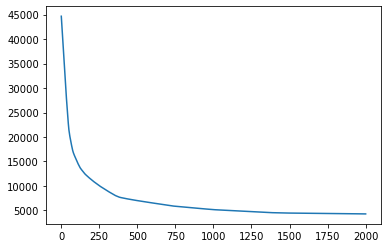

In [876]:
plt.figure()
plt.plot(np.arange(1,len(errors)+1), errors)


In [877]:
print(a)

[ 142825.777614    -53013.14697456  128315.95536232 -182891.24296814
  186816.89331615 -139936.27406722   69825.21405497  -12992.24428654
   -8221.56409175   -1859.41346951   18095.81654388  -14385.17389147
  -16039.18638669]


In [878]:
h1 = hypothesis(X,a)
print(np.mean(h1-y))
print(np.var(h1-y))

-16932.335443570322
85280368081.3819


In [879]:
print(lamb)

0.005


In [880]:
w

array([ 10369.79166667,  30184.91666667,  50084.32930729,  70671.2000376 ,
        89548.22746234, 101960.50393598, 110293.89867871, 109338.85127391,
       101675.39297018,  89236.11312581,  72974.49962403,  51483.26356648,
        25249.87893496])

In [881]:
a

array([ 142825.777614  ,  -53013.14697456,  128315.95536232,
       -182891.24296814,  186816.89331615, -139936.27406722,
         69825.21405497,  -12992.24428654,   -8221.56409175,
         -1859.41346951,   18095.81654388,  -14385.17389147,
        -16039.18638669])

In [882]:
X[19]*5

-3.3599999999999994